In [15]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

1. Use the NestMLP model defined in Section 6.1 and access the parameters of the various layers.

In [2]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.LazyLinear(64), nn.ReLU(),
                                 nn.LazyLinear(32), nn.ReLU())
        self.linear = nn.LazyLinear(16)

    def forward(self, X):
        return self.linear(self.net(X))

In [12]:
model = NestMLP()
X = torch.rand(2, 4)
Y = model(X)
print(model.net.state_dict()) # the first linear layer

OrderedDict([('0.weight', tensor([[-0.4825,  0.1158, -0.4583,  0.0557],
        [ 0.2804,  0.3746, -0.3482,  0.0381],
        [ 0.2685, -0.3733, -0.2402,  0.3933],
        [-0.1885, -0.0969, -0.4118,  0.2625],
        [-0.1086,  0.0765, -0.3236,  0.3741],
        [ 0.1855,  0.2733,  0.3100,  0.0028],
        [ 0.3493,  0.0521, -0.0493,  0.4536],
        [-0.2007,  0.2518,  0.1484,  0.0397],
        [ 0.0562, -0.2188,  0.3640, -0.3255],
        [-0.1737,  0.4658, -0.1568, -0.0823],
        [ 0.0502, -0.2572, -0.2651,  0.1225],
        [-0.0873,  0.4053,  0.2776,  0.1599],
        [-0.1660,  0.4878, -0.3197, -0.1083],
        [-0.3782, -0.1689, -0.0773,  0.0826],
        [ 0.0184, -0.2055,  0.3558,  0.2844],
        [-0.0245, -0.1823, -0.0565,  0.4894],
        [ 0.2570, -0.1607,  0.4275, -0.3375],
        [-0.3212,  0.2109,  0.3669,  0.0774],
        [ 0.4781, -0.0848,  0.2411, -0.4318],
        [ 0.3114, -0.2535,  0.2927, -0.1734],
        [ 0.0476, -0.1793,  0.4948, -0.3102],
        

c:\Users\Administrator.DESKTOP-II8P465\anaconda3\envs\d2l\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [13]:
print(model.linear.state_dict())

OrderedDict([('weight', tensor([[ 9.8876e-02, -2.3285e-02,  1.2372e-01,  1.2952e-01,  7.5912e-02,
          1.4864e-01,  3.3802e-02,  1.7301e-01, -2.9752e-02, -5.6624e-02,
          8.0996e-02, -6.2062e-02,  8.5556e-02,  5.9953e-02,  1.7193e-01,
          2.9697e-02,  9.6252e-02, -5.5224e-02, -1.2769e-01, -1.7155e-01,
         -1.1948e-02, -3.9053e-02, -8.4407e-02,  4.8727e-02,  1.2358e-01,
         -1.8363e-02,  9.6839e-02,  5.9000e-02, -5.8464e-02,  7.3457e-02,
          5.2444e-02,  7.7920e-02],
        [ 1.5593e-01, -7.3586e-02, -5.9770e-02, -1.5370e-01,  1.5144e-01,
          6.5117e-02, -1.8259e-02, -1.6255e-02, -6.8561e-03,  8.6653e-02,
          1.3592e-01, -1.1297e-01,  5.6694e-02,  1.0735e-01,  1.5461e-01,
         -1.1355e-01,  7.0232e-02, -9.6200e-02, -1.2916e-02, -8.0150e-02,
         -7.0565e-02,  1.1163e-01,  1.6614e-01,  1.3052e-01, -5.9399e-02,
          2.7591e-02, -1.6496e-01,  1.5961e-01,  7.1671e-02, -8.0782e-03,
         -1.1478e-01,  1.2270e-01],
        [ 1.0595

2. Construct an MLP containing a shared parameter layer and train it. During the training process, observe the model parameters and gradients of each layer.

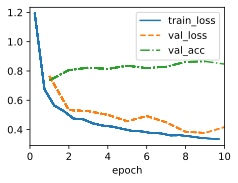

In [17]:
class sharedMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_inputs, lr):
        super().__init__()
        shared = nn.LazyLinear(num_inputs)
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), shared, nn.ReLU(),
                                 shared, nn.ReLU(), nn.LazyLinear(num_outputs))

data = d2l.FashionMNIST(batch_size=256)
hparams = {'num_inputs':28*28,'num_outputs':10,'lr':0.1}
model = sharedMLP(**hparams)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

3. Why is sharing parameters a good idea?

(1) Sharing parameters reduces the number of parameters that need to be stored.

(2) It prevents overfitting.

(3) Sharing parameters can help the model converge faster because it can learn common patterns more effectively.